In [1]:
from keras.layers import Input, Dense
from keras.models import Model


Using TensorFlow backend.


In [3]:
encoding_dim=64

input_img=Input(shape=(784,))

encoded=Dense(encoding_dim,activation='relu')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)

decoder=Model(input_img,decoded)

In [4]:
encoder=Model(input_img,encoded)

In [5]:
encoded_input=Input(shape=(encoding_dim,))

decoder_layer=autoencoder.layers[-1]

decoder=Model(encoded_input,decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')

In [19]:
from keras.datasets import fashion_mnist
import numpy as np
(xtrain,_),(xtest,_)=fashion_mnist.load_data()
xtrain.shape
len(xtrain)
xtrain.shape[1:]

4423680/4422102 [==============================] - 6s 1us/step


(28, 28)

In [20]:
xtrain=xtrain.astype('float32')/255
xtest=xtest.astype('float32')/255
xtrain=xtrain.reshape(len(xtrain),np.prod(xtrain.shape[1:]))
xtest=xtest.reshape(len(xtest),np.prod(xtest.shape[1:]))


In [ ]:
autoencoder.fit(xtrain,xtrain,epochs=50,batch_size=256,validation_data=(xtest,xtest))

In [22]:
encoded_imgs=encoder.predict(xtest)
decoded_imgs=decoder.predict(encoded_imgs)

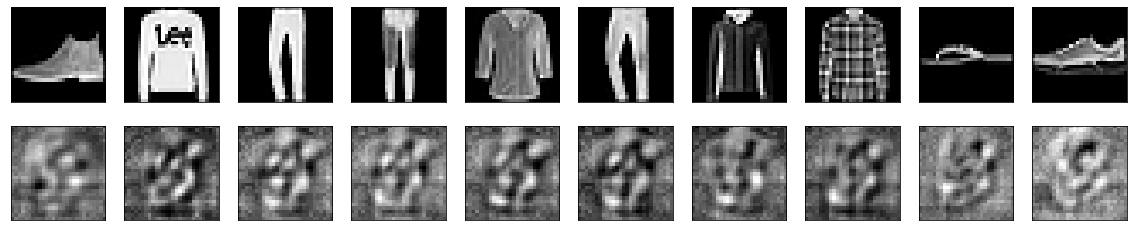

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    # display orignial
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #display reconstruction
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()